In [52]:
import tensorflow as tf
from tensorflow.keras.utils import get_file
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os 
from IPython.display import display
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img

In [53]:
# return data set(in batch size) from directory where each images belong to one 
# class is in the subdirectory 
# load data
def get_train():
    data_train = image_dataset_from_directory(
        "C:/Users/Administrator/Desktop/ANDI/AD_NC/train", labels = "inferred", label_mode= None, image_size=(128, 128), batch_size=32, validation_split=0.3, subset="training", seed=1
    )

    train_dataset = data_train.map(lambda x: x / 255.0)
    print("train data: ", data_train)
    return train_dataset
train_data = get_train()

def get_validation():
    data_val = image_dataset_from_directory(
        "C:/Users/Administrator/Desktop/ANDI/AD_NC/train", labels = "inferred", label_mode= None, image_size=(128, 128), batch_size=32, validation_split=0.3, subset="validation", seed=1
    )

    val_dataset = data_val.map(lambda x: x / 255.0)
    print("val data: ", data_val)
    return val_dataset
val_data = get_validation()


def get_test():
    data_test = image_dataset_from_directory(
        "C:/Users/Administrator/Desktop/ANDI/AD_NC/test", labels = "inferred", label_mode= None, image_size=(128, 128), batch_size=32
    )

    test_dataset = data_test.map(lambda x: x / 255.0)
    print("test data: ", data_test)
    return test_dataset
test_data = get_test()

Found 21520 files belonging to 2 classes.
Using 15064 files for training.
train data:  <BatchDataset shapes: (None, 128, 128, 3), types: tf.float32>
Found 21520 files belonging to 2 classes.
Using 6456 files for validation.
val data:  <BatchDataset shapes: (None, 128, 128, 3), types: tf.float32>
Found 9000 files belonging to 2 classes.
test data:  <BatchDataset shapes: (None, 128, 128, 3), types: tf.float32>


train picture: 


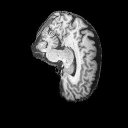

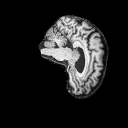

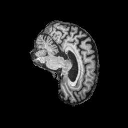

test picture: 


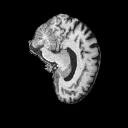

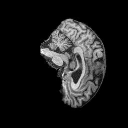

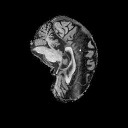

In [54]:
# check to see the training graph
def show_picture(data):
    # takes one element from "data" form dataset
    for batch in data.take(1):
 
        # print(batch.shape[0])
        # if(batch.shape[0] >=3):
        for i in range(3):
            display(array_to_img(batch[i]))
print("train picture: ")
show_picture(train_data)
print("test picture: ")
show_picture(test_data)


In [62]:

""" rerurn img array representation of one image, return img array reprentation """
def get_img(data):
    imgs = data.take(1)
    # print(type(imgs))
    iterator = iter(imgs)
    # print(iterator.get_next()[0])
    img_array = iterator.get_next()[0]
    # img = array_to_img(iterator.get_next()[0])
    # display(img)
    print(type(img_array))
    return img_array

""" resize image by a down scaling factor
    input: img_data reprentation
    output: scaling down image 
    old
"""
def resize_img_data(img_data, down_scale_factor=4):
    img_data = get_img(img_data)
    h, w = img_data.shape[0], img_data.shape[1]
    # print(h,w)
    # for batch in imgs:
    #     img = array_to_img(batch[2])
    #     print(batch[2])
    #     break
    resized_img_data = tf.image.resize(img_data, [h//down_scale_factor, w//down_scale_factor])
    print(resized_img_data.shape)
    resized_img = array_to_img(resized_img_data)
    display(resized_img)
    # print(resized_img_data)
    return resized_img_data
# resized_img_data = resize_img_data(train_data)
# print("old function: ", type(resized_img_data))
# print("old: ", resized_img_data)

""" restored size image """ 
# restored_img_data = tf.image.resize(resized_img_data, (128, 128), method='bicubic')
# print(restored_img_data.shape)
# restored_img = array_to_img(restored_img_data)
# display(restored_img)

""" resize image by a given size
    input: img_data reprentation
    output: scaling down image
"""
def resize_img(img_data, size):
    resized_img_data = tf.image.resize(img_data, [size, size], method='bicubic')
    print("----------")
    print(resized_img_data.shape)
    resized_img_data = tf.image.resize(resized_img_data, (128, 128), method='bicubic')
    print(resized_img_data.shape)
    # print(type(resized_img_data))

    return resized_img_data
    # label 返回怎么解决？？？
    # return (resized_img_data, train_data)

""" resize the all the train image data and display the first image"""
@tf.autograph.experimental.do_not_convert
def resize_img_flow(data, size):
    data = data.map(
        lambda x: (resize_img(x, size), x))

    # first_img_data = get_img(data)
    # first_img = array_to_img(first_img_data)
    # display(first_img)
    # print(type(data))
    return data
resized_train_data = resize_img_flow(train_data, 32)
resized_train_data.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
# resized_img_data1 = resize_img_flow(resized_img_data1, 128)
# print("new function: ", type(resized_img_data1))

# y = get_img(train_data)
# resize_img(train_data, 32)
# print(type(resized_img_data1))

resized_val = resize_img_flow(val_data, 32)
resized_val.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

resized_test = resize_img_flow(test_data, 32)
resized_test.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
# print(resized_train_data)
# print(resize_val)

----------
(None, 32, 32, 3)
(None, 128, 128, 3)
----------
(None, 32, 32, 3)
(None, 128, 128, 3)
----------
(None, 32, 32, 3)
(None, 128, 128, 3)


<PrefetchDataset shapes: ((None, 128, 128, 3), (None, 128, 128, 3)), types: (tf.float32, tf.float32)>

In [ ]:
# import numpy as np

# def rgb2gray(rgb):

#     r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
#     gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

#     return gray
# rgb2gray(resized_img_data)

<tf.Tensor: shape=(128, 128), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [63]:
# buld model 
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras import Model

height, width = 32, 32
def get_model():
 
    input_img = Input((height, width, 3))
    lay = Conv2D(64, (9,9), padding = 'same', activation= 'relu')(input_img)
    lay = Conv2D(32, (1,1), padding = 'same', activation= 'relu')(lay)
    lay = Conv2D(3, (5,5), padding = 'same', activation= 'relu')(lay)
    model = Model(inputs=input_img, outputs=lay)
    model.summary()
    return model


model = get_model()


Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 64)        15616     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        2080      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 3)         2403      
Total params: 20,099
Trainable params: 20,099
Non-trainable params: 0
_________________________________________________________________


In [91]:
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam


# loss function
loss_fun = MeanSquaredError()
optimizer_Adam = Adam(0.001)

# by change base log law log10(x) = ln(x)/ln(10)
def log10fun(x):
    numerator = tf.math.log(x)
    deno = tf.math.log(x)
    return numerator/deno

# signal noise ratio
def psnr_metrics(crop, original):
    mse = tf.losses.mean_squared_error(crop, original)
    psnr = 10 * log10fun(1/tf.sqrt(mse))
    return psnr

model.compile(loss=loss_fun, optimizer=optimizer_Adam, metrics=['MeanSquaredError', psnr_metrics])

resized_train_data


# print(resized_img_data1.shape)
# print(train_data.shape)

<MapDataset shapes: ((None, 128, 128, 3), (None, 128, 128, 3)), types: (tf.float32, tf.float32)>

In [92]:
model.fit(resized_train_data, epochs=1, validation_data=resized_val)

 17/471 [>.............................] - ETA: 7:20 - loss: 0.0072 - mean_squared_error: 0.0072 - psnr_metrics: nan

KeyboardInterrupt: 

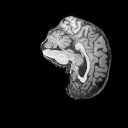

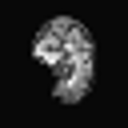

(128, 128, 3)
(128, 128, 3)


In [31]:
# original_img = get_img(train_data)
# display(array_to_img(original_img))
# resized_img_data = tf.image.resize(resized_img_data, (128, 128), method='bicubic')
# display(array_to_img(resized_img_data))

# print(resized_img_data.shape)
# print(original_img.shape)

# model.fit(resized_img_data, original_img, epochs=1)

In [88]:
import numpy as np
# mse = 2
# 10*math.log10(1/math.sqrt(mse))

# x4 = tf.constant([10.0])
# tf.sqrt()

# by change base log law log10(x) = ln(x)/ln(10)
def log10fun(x):
    numerator = tf.math.log(x)
    deno = tf.math.log(x)
    return numerator/deno

a = [10.0]
b = [2.0]
tf.losses.mean_squared_error(a, b)


<tf.Tensor: shape=(), dtype=float32, numpy=64.0>